# Analyze bursting properties of neurons

- Get values from unit_profile table
- Run unit_profile.py to calculate the metrics

## Load data from unit_profile table

In [38]:
from database.load import ProjectLoader
from deafening.plot import plot_bar_comparison, plot_per_day_block
import matplotlib.pyplot as plt
from util import save

save_path = save.make_dir(ProjectLoader().path / 'Analysis', 'Results', add_date=False)

# Load database
db = ProjectLoader().load_db()
# # SQL statement
df = db.to_dataframe(
    f"SELECT unit.*, cluster.taskSession, cluster.taskSessionDeafening, cluster.taskSessionPostDeafening, cluster.dph, cluster.block10days "
    f"FROM unit_profile unit INNER JOIN cluster ON cluster.id = unit.clusterID WHERE cluster.analysisOK=TRUE")
df.set_index('clusterID')

,birdID,taskName,taskSession,site,channel,unit,region,SNR,spkHeight,spkWidth,...,burstDurationDir,burstFreqDir,burstMeanNbSpkDir,burstFractionDir,burstIndexDir,taskSession,taskSessionDeafening,taskSessionPostDeafening,dph,block10days
clusterID,,,,,,,,,,,,,,,,,,,,,
6,b70r38,Postdeafening,10,S01,Ch15,Cluster01,LMAN,12.776,742.427,200.333,...,None,None,None,None,NaN,10,10,10,129,1
9,b70r38,Postdeafening,15,S02,Ch15,Cluster01,LMAN,13.287,851.109,99.667,...,6.113,2.048,2.9,31.9,0.103,15,15,15,134,2
10,b70r38,Postdeafening,15,S03,Ch15,Cluster01,LMAN,15.214,1429.058,133.000,...,5.994,8.366,3.282,70.0,0.100,15,15,15,134,2
11,b70r38,Postdeafening,15,S05,Ch15,Cluster01,LMAN,18.747,1801.857,99.667,...,None,None,None,None,NaN,15,15,15,134,2
12,b70r38,Postdeafening,16,S02,Ch15,Cluster01,LMAN,10.642,518.771,267.000,...,None,None,None,None,NaN,16,16,16,135,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,k27o36,Postdeafening,28,S01,Ch01,Cluster01,LMAN,15.268,2076.868,375.313,...,None,None,None,None,NaN,28,28,28,164,3
126,k27o36,Postdeafening,31,S02,Ch01,Cluster01,LMAN,11.367,1210.721,312.813,...,None,None,None,None,NaN,31,31,31,167,4
129,o25w75,Postdeafening,53,S02,Ch01,Cluster01,LMAN,13.380,3463.274,312.813,...,None,None,None,None,NaN,53,53,53,227,4


## Compare pre vs. post-deafening

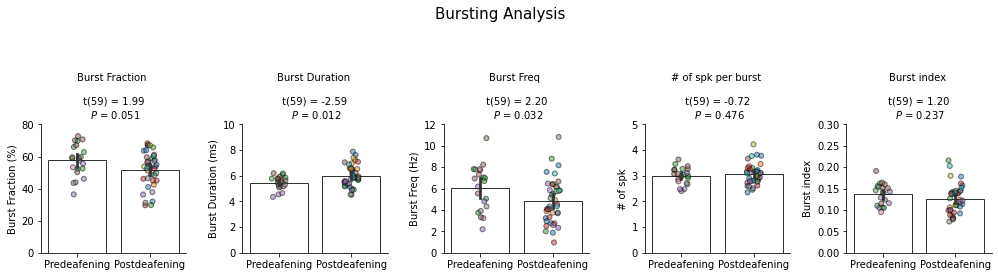

In [39]:
# Parameters
nb_row = 3
nb_col = 5
save_fig = False
fig_ext = '.png'

# Plot the results
fig, ax = plt.subplots(figsize=(14, 4))
plt.suptitle('Bursting Analysis', y=.95, fontsize=15)

# Burst Fraction
ax = plt.subplot2grid((nb_row, nb_col), (1, 0), rowspan=2, colspan=1)
plot_bar_comparison(ax, df['burstFractionUndir'], df['taskName'], hue_var=df['birdID'],
                    title='Burst Fraction', y_label='Burst Fraction (%)',
                    y_lim=[0, 80],
                    col_order=("Predeafening", "Postdeafening"),
                    )

# Burst Duration
ax = plt.subplot2grid((nb_row, nb_col), (1, 1), rowspan=2, colspan=1)
plot_bar_comparison(ax, df['burstDurationUndir'], df['taskName'], hue_var=df['birdID'],
                    title='Burst Duration', y_label='Burst Duration (ms)',
                    y_lim=[0, 10],
                    col_order=("Predeafening", "Postdeafening"),
                    )

# Burst Freq
ax = plt.subplot2grid((nb_row, nb_col), (1, 2), rowspan=2, colspan=1)
plot_bar_comparison(ax, df['burstFreqUndir'], df['taskName'], hue_var=df['birdID'],
                    title='Burst Freq', y_label='Burst Freq (Hz)',
                    y_lim=[0, 12],
                    col_order=("Predeafening", "Postdeafening"),
                    )

# Nb of spk per burst
ax = plt.subplot2grid((nb_row, nb_col), (1, 3), rowspan=2, colspan=1)
plot_bar_comparison(ax, df['burstMeanNbSpkUndir'], df['taskName'], hue_var=df['birdID'],
                    title='# of spk per burst', y_label='# of spk',
                    y_lim=[0, 5],
                    col_order=("Predeafening", "Postdeafening"),
                    )

# Burst index
ax = plt.subplot2grid((nb_row, nb_col), (1, 4), rowspan=2, colspan=1)
plot_bar_comparison(ax, df['burstIndexUndir'], df['taskName'], hue_var=df['birdID'],
                    title='Burst index', y_label='Burst index',
                    y_lim=[0, 0.3],
                    col_order=("Predeafening", "Postdeafening"),
                    )

fig.tight_layout()

# Save results
if save_fig:
    save_path = save.make_dir(ProjectLoader().path / 'Analysis', 'Results')
    save.save_fig(fig, save_path, 'BurstingAnalysis', fig_ext=fig_ext)
else:
    plt.show()

## Plot the results across day blocks

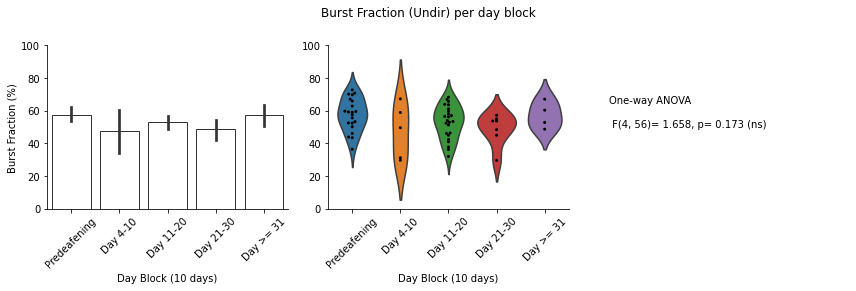

In [40]:
# Plot burst fraction per day blocks
plot_per_day_block(df, ind_var_name='block10days', dep_var_name='burstFractionUndir',
                   title='Burst Fraction (Undir) per day block',
                   y_label='Burst Fraction (%)', y_lim=[0, 100],
                   fig_name='BurstFraction_Undir_per_day_block',
                   save_fig=False, fig_ext='.png'
                   )

## Combine block 3 & 4

- Combine values from 3 and 4th block into a single block (Day >= 21)

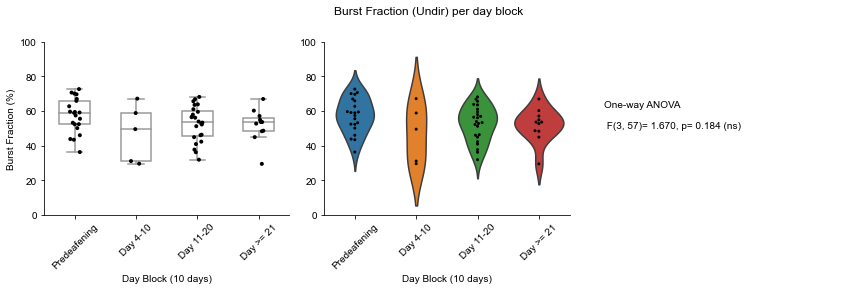

In [51]:
df['block10days'] = df['block10days'].replace(4, 3)

save_fig = False
fig_ext = '.png'

# Plot motif FR per day blocks
plot_per_day_block(df, ind_var_name='block10days', dep_var_name='burstFractionUndir',
                   title='Burst Fraction (Undir) per day block',
                   y_label='Burst Fraction (%)', y_lim=[0, 100],
                   plot_type='box',
                   fig_name='BurstFraction_Undir_per_day_block',
                   save_folder_name='Results',
                   save_fig=save_fig, fig_ext=fig_ext
                   )